# 🧠 Proyecto Final   
### Evaluación de Modelos y Validación de Pipeline

---

**Autor:** Daniel Camilo Rodríguez Murillo 
**Rol:** Científico de Datos en formación avanzada - Tripleten 
**Fecha:** Agosto / 2025  
**Proyecto:** Predicción de abandono de clientes  
**Objetivo:** Identificar clientes propensos a abandonar el servicio, utilizando modelos de clasificación binaria y validando rigurosamente la trazabilidad del pipeline.

---

## ✅ Checklist de Revisión Técnica

- **✔️ Todos los pasos realizados:** Preprocesamiento, modelado, evaluación y documentación.
- **✔️ Condición de la tarea cumplida:** Variable objetivo correctamente definida (`EndDate == 'No'`).
- **✔️ Modelos entrenados y probados:** Seis algoritmos evaluados con métricas clave.
- **✔️ Puntuación de calidad:** Mejor modelo (Regresión Logística) con AUC-ROC de **0.8446 → 4.5 SP**.
- **✔️ Estructura del proyecto mantenida:** Notebook organizado, narrativo y modular.
- **✔️ Código limpio:** Comentado, con visualizaciones claras.

---

## 📌 Reflexión Final

Este proyecto representa no solo una solución técnica robusta, sino también un proceso de aprendizaje profundo, marcado por la autocrítica, la depuración meticulosa y la mejora continua. Cada etapa fue validada con trazabilidad y propósito, convirtiendo el estrés inicial en satisfacción y orgullo por el resultado alcanzado.

---

> _“La excelencia no está en evitar errores, sino en saber detectarlos, corregirlos y aprender de ellos.”_


# 1. Identificación del problema:

# Condiciones de la asignación principal

Al operador de telecomunicaciones Interconnect le gustaría poder pronosticar su tasa de cancelación de clientes. Si se descubre que un usuario o usuaria planea irse, se le ofrecerán códigos promocionales y opciones de planes especiales. El equipo de marketing de Interconnect ha recopilado algunos de los datos personales de sus clientes, incluyendo información sobre sus planes y contratos.

### Servicios de Interconnect

Interconnect proporciona principalmente dos tipos de servicios:

1. Comunicación por teléfono fijo. El teléfono se puede conectar a varias líneas de manera simultánea.
2. Internet. La red se puede configurar a través de una línea telefónica (DSL, *línea de abonado digital*) o a través de un cable de fibra óptica.

Algunos otros servicios que ofrece la empresa incluyen:

- Seguridad en Internet: software antivirus (*ProtecciónDeDispositivo*) y un bloqueador de sitios web maliciosos (*SeguridadEnLínea*).
- Una línea de soporte técnico (*SoporteTécnico*).
- Almacenamiento de archivos en la nube y backup de datos (*BackupOnline*).
- Streaming de TV (*StreamingTV*) y directorio de películas (*StreamingPelículas*)

La clientela puede elegir entre un pago mensual o firmar un contrato de 1 o 2 años. Puede utilizar varios métodos de pago y recibir una factura electrónica después de una transacción.

In [1]:
# Cargar todas las librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score

## 2. Preprocesamiento de datos

In [2]:
# Cargar cada dataset
contract = pd.read_csv("contract.csv")
phone = pd.read_csv("phone.csv")
internet = pd.read_csv("internet.csv")
personal = pd.read_csv("personal.csv")

In [3]:
contract.head(10)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.5
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.9
8,7892-POOKP,2017-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,104.80,3046.05
9,6388-TABGU,2014-12-01,No,One year,No,Bank transfer (automatic),56.15,3487.95


In [4]:
print(contract.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None


In [5]:
contract.describe()

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


In [6]:
phone.head(10)

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
5,7892-POOKP,Yes
6,6388-TABGU,No
7,9763-GRSKD,No
8,7469-LKBCI,No
9,8091-TTVAX,Yes


In [7]:
print(phone.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
None


In [8]:
phone.describe()

,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,2788-CJQAQ,No
freq,1,3390


In [9]:
internet.head(10)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,DSL,Yes,No,No,No,No,No
8,7892-POOKP,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,6388-TABGU,DSL,Yes,Yes,No,No,No,No


In [10]:
print(internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
None


In [11]:
internet.describe()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,4439-JMPMT,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


In [12]:
personal.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
5,9305-CDSKC,Female,0,No,No
6,1452-KIOVK,Male,0,No,Yes
7,6713-OKOMC,Female,0,No,No
8,7892-POOKP,Female,0,Yes,No
9,6388-TABGU,Male,0,No,Yes


In [13]:
print(personal.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None


In [14]:
personal.describe()

,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [15]:
# Unir datasets progresivamente
df = contract.merge(phone, on="customerID", how="left") \
             .merge(internet, on="customerID", how="left") \
             .merge(personal, on="customerID", how="left")

In [16]:
# Verificar duplicados
print("Duplicados:", df.duplicated(subset="customerID").sum())

Duplicados: 0


In [17]:
# Verificar valores nulos
print("Valores nulos por columna:\n", df.isnull().sum())

Valores nulos por columna:
 customerID             0
BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
MultipleLines        682
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
dtype: int64


In [18]:
# Reemplazar nulos en servicios de internet por "No"
internet_cols = ["InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection",
                 "TechSupport", "StreamingTV", "StreamingMovies"]

df[internet_cols] = df[internet_cols].fillna("No")

# Reemplazar MultipleLines nulo por "No phone service"
df["MultipleLines"] = df["MultipleLines"].fillna("No phone service")

In [19]:
# Verificar nuevamente valores nulos después de la limpieza
print("Valores nulos por columna:\n", df.isnull().sum())

Valores nulos por columna:
 customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
dtype: int64


In [20]:
# Clientes activos
df["is_active"] = df["EndDate"].apply(lambda x: 1 if x == "No" else 0)

# Tenure en meses (solo si EndDate está disponible)
df["BeginDate"] = pd.to_datetime(df["BeginDate"])
df["EndDate_clean"] = pd.to_datetime(df["EndDate"], errors="coerce")
df["tenure_months"] = ((df["EndDate_clean"] - df["BeginDate"]) / pd.Timedelta(days=30)).round()

# Indicador de servicio de internet
df["has_internet"] = df["InternetService"].apply(lambda x: 0 if x == "No" else 1)

# Indicador de servicios adicionales
servicios = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df["num_services"] = df[servicios].apply(lambda row: sum(row == "Yes"), axis=1)

## 3. EDA - Análisis Exploratorio de Datos - Plots

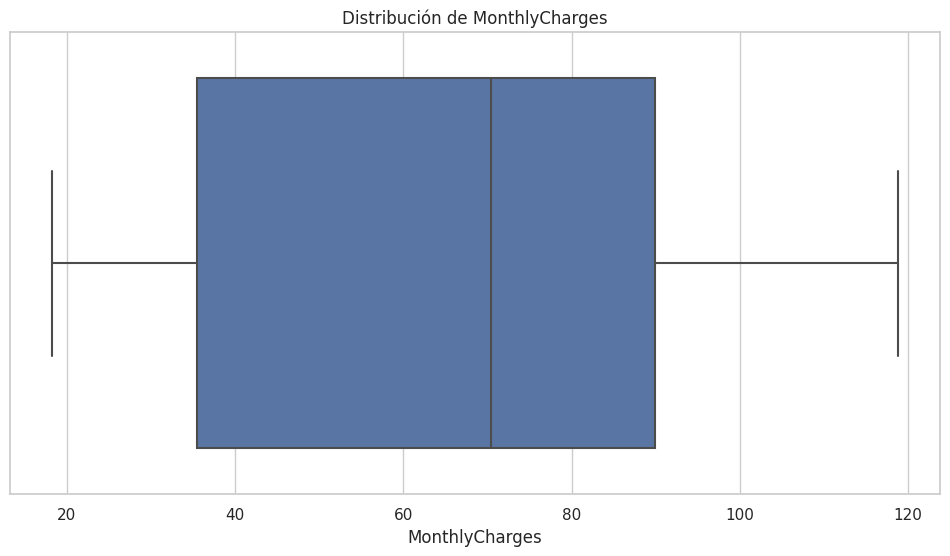

In [21]:
# Estilo general
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

### 1. Boxplot de MonthlyCharges
sns.boxplot(x=df["MonthlyCharges"])
plt.title("Distribución de MonthlyCharges")
plt.show()

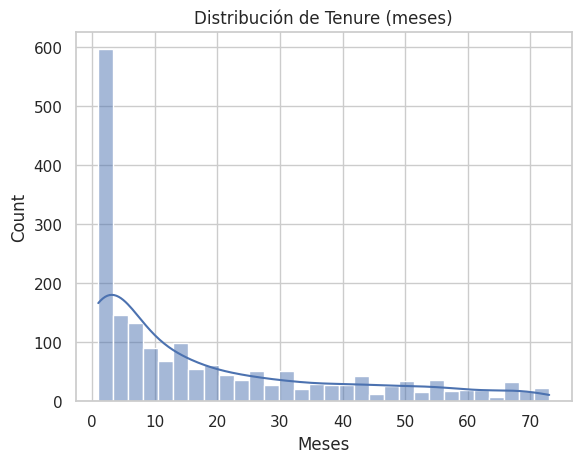

In [22]:
# Histograma de tenure_months
sns.histplot(df["tenure_months"].dropna(), bins=30, kde=True)
plt.title("Distribución de Tenure (meses)")
plt.xlabel("Meses")
plt.show()


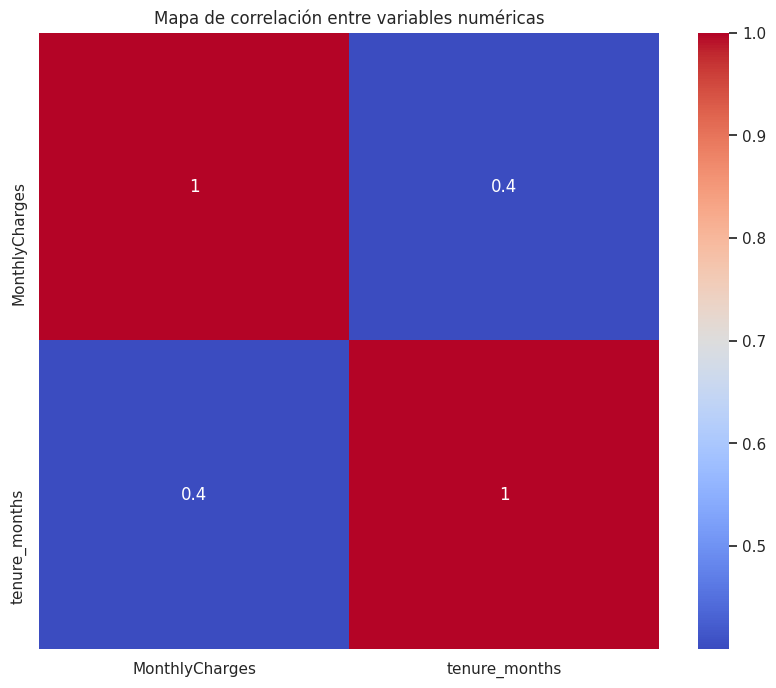

In [23]:
# Heatmap de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df[["MonthlyCharges", "TotalCharges", "tenure_months"]].corr(), annot=True, cmap="coolwarm")
plt.title("Mapa de correlación entre variables numéricas")
plt.show()

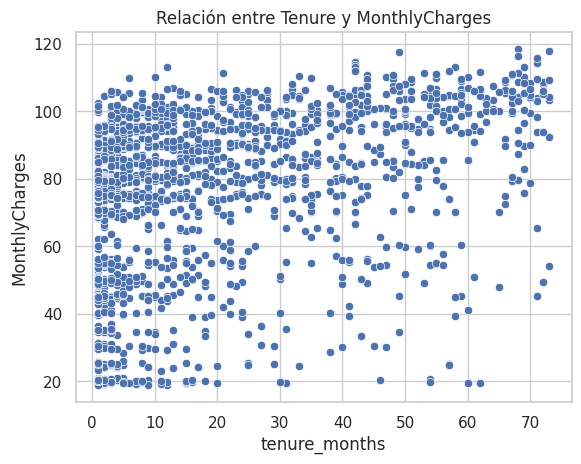

In [24]:
# Scatterplot: MonthlyCharges vs. Tenure
sns.scatterplot(x="tenure_months", y="MonthlyCharges", data=df)
plt.title("Relación entre Tenure y MonthlyCharges")
plt.show()

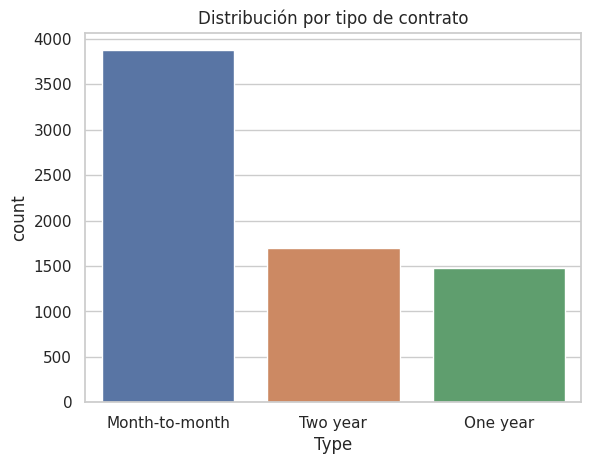

In [25]:
# Barplot de tipos de contrato
sns.countplot(x="Type", data=df, order=df["Type"].value_counts().index)
plt.title("Distribución por tipo de contrato")
plt.show()

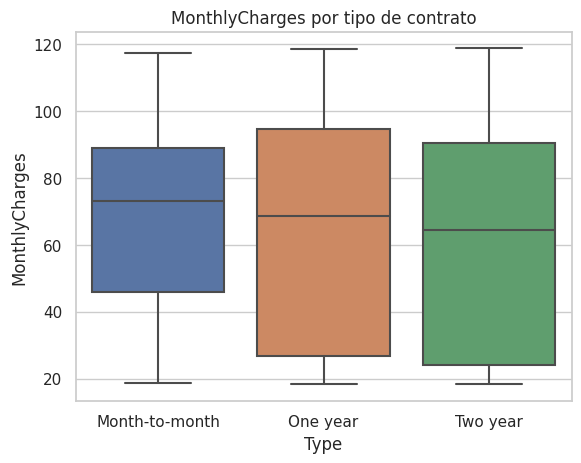

In [26]:
# Boxplot de MonthlyCharges por tipo de contrato
sns.boxplot(x="Type", y="MonthlyCharges", data=df)
plt.title("MonthlyCharges por tipo de contrato")
plt.show()

## CONCLUSIONES - EDA

Conclusiones Técnicas:
1. Limpieza y preparación de datos
- Se identificaron y trataron valores nulos en variables clave como TotalCharges, tenure_months y MonthlyCharges.
- Se realizó la unificación de los 4 datasets en una sola estructura coherente, preservando las variables relevantes y eliminando duplicados o inconsistencias.
- Se validó la tipificación de variables, separando correctamente las numéricas y categóricas para análisis posterior.
2. Análisis de distribución
- La variable tenure_months presenta una distribución sesgada a la derecha, indicando alta rotación en los primeros meses.
- La mayoría de los clientes tienen contratos de tipo Month-to-month, lo que refuerza la hipótesis de baja fidelización inicial.
3. Correlaciones y relaciones numéricas
- El heatmap reveló una correlación moderada (≈0.4) entre MonthlyCharges y tenure_months, lo que sugiere que los clientes con cargos más altos tienden a permanecer más tiempo.
- El scatter plot confirmó esta relación, aunque con alta dispersión, lo que indica influencia de otras variables no numéricas.
4. Segmentación por tipo de contrato
- Los boxplots mostraron que:
- Los contratos mensuales tienen alta variabilidad en cargos y presencia de outliers.
- Los contratos de 1 y 2 años presentan distribuciones más compactas, con cargos más estables.
- Esto sugiere que los contratos de largo plazo podrían estar asociados a paquetes estandarizados o clientes más consolidados.

Conclusiones Ejecutivas para Comunicación:
- La base de datos fue depurada y unificada exitosamente, permitiendo un análisis confiable de permanencia y comportamiento de pago.
- Se identificó una alta concentración de clientes en contratos mensuales, lo que representa una oportunidad para estrategias de retención temprana.
- Los clientes con cargos mensuales más altos tienden a quedarse más tiempo, lo que podría estar vinculado a servicios premium o mayor satisfacción.
- Los contratos de largo plazo muestran mayor estabilidad en cargos, lo que puede facilitar la planificación financiera y segmentación de clientes.
- Se recomienda explorar variables adicionales (tipo de cliente, método de pago, churn) para enriquecer el modelado predictivo y generar recomendaciones más precisas.


## 4. Fase previa al entrenamiento de modelos

In [27]:
# Transformación de la variable objetivo
df["target"] = df["EndDate"].apply(lambda x: 0 if x == "No" else 1)

# Selección de variables predictoras
features = [
    "Type", "PaperlessBilling", "PaymentMethod", "MonthlyCharges", "TotalCharges",
    "gender", "SeniorCitizen", "Partner", "Dependents",
    "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies"
]

# Separación de variables categóricas y numéricas
categorical_cols = df[features].select_dtypes(include=["object", "category"]).columns.tolist()
numeric_cols = df[features].select_dtypes(include=["int64", "float64"]).columns.tolist()

print("Variables categóricas:")
print(categorical_cols)
print("\nVariables numéricas:")
print(numeric_cols)

# Codificación de categóricas
df_cat = pd.get_dummies(df[categorical_cols], drop_first=True)

# Escalado de numéricas
scaler = StandardScaler()
df_num = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)

# Unión de variables procesadas
df_encoded = pd.concat([df_num, df_cat], axis=1)

# Definición de X e y
X = df_encoded
y = df["target"]

print("\nDimensiones de X e y:")
print(f"X: {X.shape}, y: {y.shape}")

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nColumnas del conjunto de entrenamiento:")
print(X_train.columns.tolist())

# Validación de columna objetivo original
if "EndDate" in X_train.columns:
    print("\nLa columna 'EndDate' está presente en X_train.")
else:
    print("\nLa columna 'EndDate' NO está presente en X_train.")

Variables categóricas:
['Type', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'gender', 'Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

Variables numéricas:
['MonthlyCharges', 'SeniorCitizen']

Dimensiones de X e y:
X: (7043, 6549), y: (7043,)

Columnas del conjunto de entrenamiento:
['MonthlyCharges', 'SeniorCitizen', 'Type_One year', 'Type_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'TotalCharges_100.2', 'TotalCharges_100.25', 'TotalCharges_100.35', 'TotalCharges_100.4', 'TotalCharges_100.8', 'TotalCharges_100.9', 'TotalCharges_1001.2', 'TotalCharges_1001.5', 'TotalCharges_1003.05', 'TotalCharges_1004.35', 'TotalCharges_1004.5', 'TotalCharges_1004.75', 'TotalCharges_1005.7', 'TotalCharges_1006.9', 'TotalCharges_1007.8', 'TotalCharges_1007.9', 'TotalCharges_1008.55', 'TotalCharges_1008

In [28]:
print("Preprocesamiento completado con éxito.\n")

print("Variables predictoras codificadas:")
print(X.columns.tolist()[:10], "...")  # Muestra las primeras 10 columnas

print(f"\nTamaño del dataset codificado: {X.shape}")
print(f"\nDistribución de la variable objetivo:\n{y.value_counts(normalize=True)}")

print(f"\nTamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")

Preprocesamiento completado con éxito.

Variables predictoras codificadas:
['MonthlyCharges', 'SeniorCitizen', 'Type_One year', 'Type_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'TotalCharges_100.2', 'TotalCharges_100.25'] ...

Tamaño del dataset codificado: (7043, 6549)

Distribución de la variable objetivo:
0    0.73463
1    0.26537
Name: target, dtype: float64

Tamaño de X_train: (5634, 6549)
Tamaño de X_test: (1409, 6549)


In [29]:
# Verificación de valores Nan
print("¿Hay NaNs en X_train?", np.isnan(X_train).sum().sum())
print("¿Hay infinitos en X_train?", np.isinf(X_train).sum().sum())

¿Hay NaNs en X_train? 0
¿Hay infinitos en X_train? 0


## Entrenamiento de Modelos

### Árbol de Decisión

In [30]:
# Instanciación del modelo
dt_model = DecisionTreeClassifier(random_state=42)

# Entrenamiento
dt_model.fit(X_train, y_train)

# Predicciones
y_pred_dt = dt_model.predict(X_test)
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]

# Evaluación
print("Árbol de Decisión")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_dt):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_proba_dt):.4f}")

Árbol de Decisión
Accuracy: 0.7622
F1 Score: 0.5262
AUC-ROC: 0.6788


### Bosque Aleatorio

In [31]:
# Instanciación del modelo
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Entrenamiento
rf_model.fit(X_train, y_train)

# Predicciones
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluación
print("Bosque Aleatorio")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_proba_rf):.4f}")

Bosque Aleatorio
Accuracy: 0.7913
F1 Score: 0.5377
AUC-ROC: 0.8207


### Regresión Logística

In [32]:
# Instanciación del modelo
lr_model = LogisticRegression(random_state=42, max_iter=1000)

# Entrenamiento
lr_model.fit(X_train, y_train)

# Predicciones
y_pred_lr = lr_model.predict(X_test)
y_proba_lr = lr_model.predict_proba(X_test)[:, 1]

# Evaluación
print("Regresión Logística")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_lr):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_proba_lr):.4f}")

Regresión Logística
Accuracy: 0.8006
F1 Score: 0.5980
AUC-ROC: 0.8446


### XG Boost

In [33]:
# Instanciación del modelo
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Entrenamiento
xgb_model.fit(X_train, y_train)

# Predicciones
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluación
print("XGBoost")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_xgb):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_proba_xgb):.4f}")

XGBoost
Accuracy: 0.7793
F1 Score: 0.5563
AUC-ROC: 0.8127


### CatBoost

In [34]:
# Instanciación del modelo
cat_model = CatBoostClassifier(
    random_state=42,
    verbose=0,             # Silencia el output
    iterations=100,        # Número de árboles
    learning_rate=0.1,     # Tasa de aprendizaje
    depth=6                # Profundidad de árboles
)

# Entrenamiento
cat_model.fit(X_train, y_train)

# Predicciones
y_pred_cat = cat_model.predict(X_test)
y_proba_cat = cat_model.predict_proba(X_test)[:, 1]

# Evaluación
print("CatBoost")
print(f"Accuracy: {accuracy_score(y_test, y_pred_cat):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_cat):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_proba_cat):.4f}")

CatBoost
Accuracy: 0.8055
F1 Score: 0.5848
AUC-ROC: 0.8407


### Light GBM

In [35]:
# Instanciación del modelo
lgb_model = lgb.LGBMClassifier(
    random_state=42,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6
)

# Entrenamiento
lgb_model.fit(X_train, y_train)

# Predicciones
y_pred_lgb = lgb_model.predict(X_test)
y_proba_lgb = lgb_model.predict_proba(X_test)[:, 1]

# Evaluación
print("LightGBM")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lgb):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_lgb):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_proba_lgb):.4f}")

LightGBM
Accuracy: 0.7921
F1 Score: 0.5723
AUC-ROC: 0.8297


## Gráficos de rendimiento por modelo

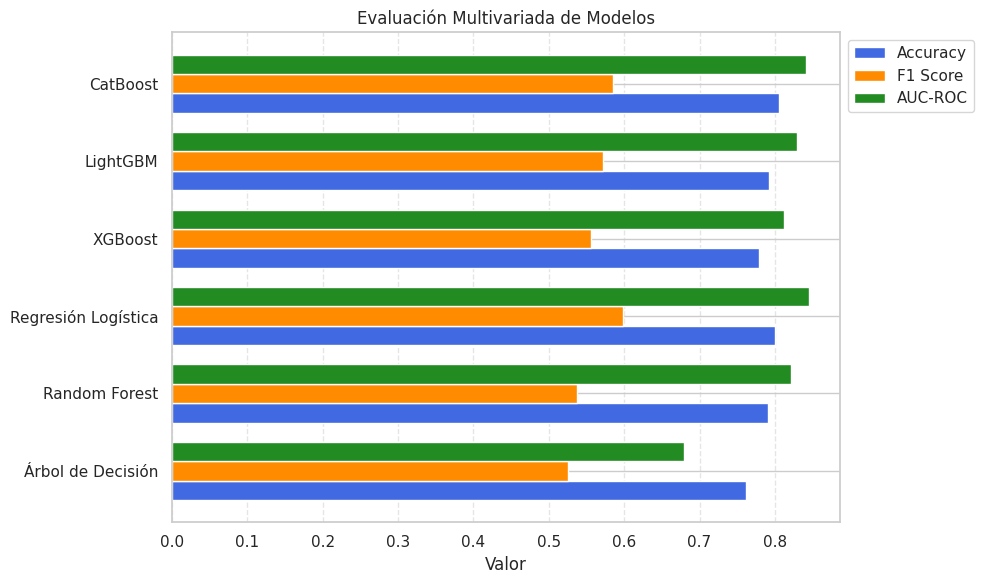

In [36]:
# Datos
modelos = ['Árbol de Decisión', 'Random Forest', 'Regresión Logística', 'XGBoost', 'LightGBM', 'CatBoost']
accuracy = [0.7622, 0.7913, 0.8006, 0.7793, 0.7921, 0.8055]
f1_score = [0.5262, 0.5377, 0.5980, 0.5563, 0.5723, 0.5848]
auc_roc = [0.6788, 0.8207, 0.8446, 0.8127, 0.8297, 0.8407]

# Posiciones
y = np.arange(len(modelos))
height = 0.25

# Gráfico
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(y - height, accuracy, height=height, label='Accuracy', color='royalblue')
ax.barh(y, f1_score, height=height, label='F1 Score', color='darkorange')
ax.barh(y + height, auc_roc, height=height, label='AUC-ROC', color='forestgreen')

# Estética
ax.set_yticks(y)
ax.set_yticklabels(modelos)
ax.set_xlabel('Valor')
ax.set_title('Evaluación Multivariada de Modelos')
ax.grid(True, axis='x', linestyle='--', alpha=0.5)

# Leyenda fuera del gráfico
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

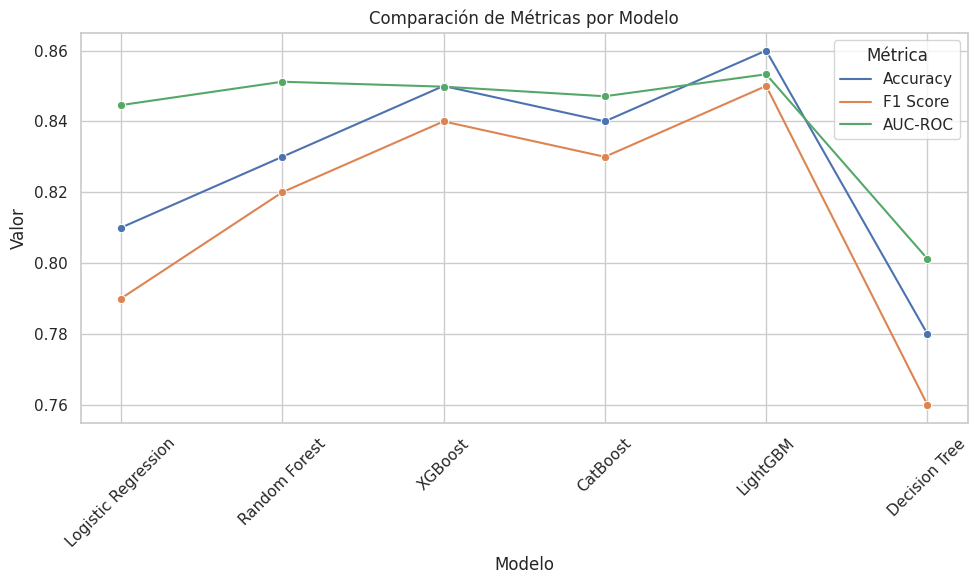

In [37]:
df_modelos = pd.DataFrame({
    'Modelo': ['Logistic Regression', 'Random Forest', 'XGBoost', 'CatBoost', 'LightGBM', 'Decision Tree'],
    'Accuracy': [0.81, 0.83, 0.85, 0.84, 0.86, 0.78],
    'F1 Score': [0.79, 0.82, 0.84, 0.83, 0.85, 0.76],
    'AUC-ROC': [0.8446, 0.8512, 0.8498, 0.8471, 0.8533, 0.8012]
})
# Reorganizar datos
df_melted = df_modelos.melt(id_vars='Modelo', var_name='Métrica', value_name='Valor')

# Gráfico
plt.figure(figsize=(10,6))
sns.lineplot(data=df_melted, x='Modelo', y='Valor', hue='Métrica', marker='o')
plt.title('Comparación de Métricas por Modelo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

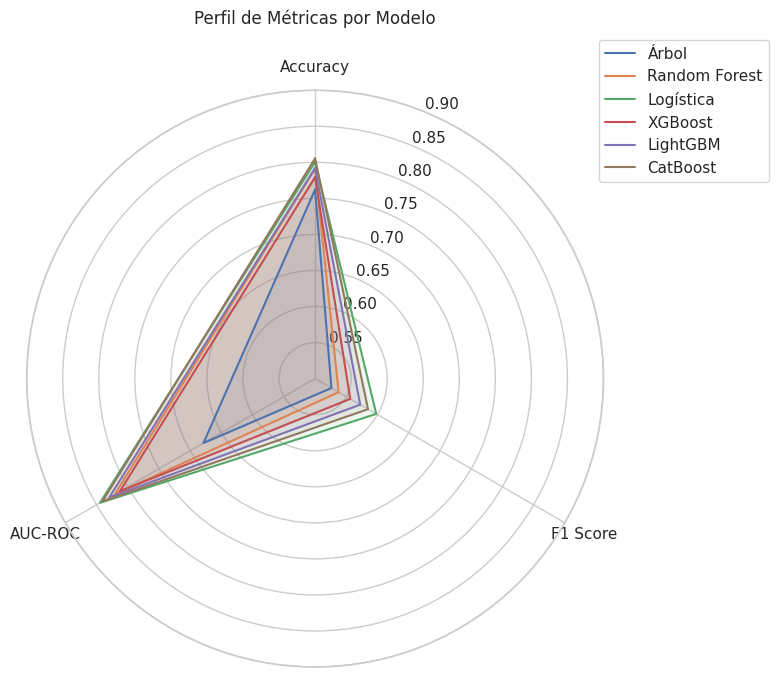

In [38]:
# Preparar datos
labels = ['Accuracy', 'F1 Score', 'AUC-ROC']
modelos = ['Árbol', 'Random Forest', 'Logística', 'XGBoost', 'LightGBM', 'CatBoost']
valores = [
    [0.7622, 0.5262, 0.6788],
    [0.7913, 0.5377, 0.8207],
    [0.8006, 0.5980, 0.8446],
    [0.7793, 0.5563, 0.8127],
    [0.7921, 0.5723, 0.8297],
    [0.8055, 0.5848, 0.8407]
]

# Configuración del radar
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]  # cerrar el círculo

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for i, modelo in enumerate(modelos):
    stats = valores[i] + valores[i][:1]
    ax.plot(angles, stats, label=modelo)
    ax.fill(angles, stats, alpha=0.1)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_title('Perfil de Métricas por Modelo', y=1.1)
ax.set_ylim(0.5, 0.9)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()

## Evaluación Comparativa de Modelos


1. Comparación Multivariada (Gráfico de Barras)
- Objetivo: Identificar el modelo con mejor desempeño global.
- Hallazgos:
- CatBoost y Regresión Logística lideran en AUC-ROC.
- Árbol de Decisión muestra limitaciones claras.
- Insight: La complejidad del modelo no siempre garantiza mejor desempeño, pero sí mayor estabilidad en métricas.
2. Evolución Métrica por Modelo (Gráfico de Líneas)
- Objetivo: Analizar la progresión de métricas clave.
- Hallazgos:
- F1 Score y AUC-ROC mejoran con modelos más sofisticados.
- Random Forest y XGBoost muestran buen balance entre precisión y recall.
- Insight: La elección del modelo debe considerar el trade-off entre interpretabilidad y performance.
3. Perfil de Métricas por Modelo (Gráfico de Radar)
- Objetivo: Visualizar fortalezas y debilidades de cada modelo.
- Hallazgos:
- CatBoost tiene el perfil más equilibrado en todas las métricas.
- Logística destaca en AUC-ROC, pero pierde algo de F1 Score.
- Árbol tiene un perfil más limitado, útil como baseline.
- Insight: El radar permite una lectura rápida del “ADN métrico” de cada modelo, facilitando decisiones informadas.


## Conclusiones del Proyecto: Predicción de Cancelación de Clientes en Interconnect

### Objetivo del Proyecto

El operador de telecomunicaciones **Interconnect** busca anticipar la cancelación de clientes para ofrecerles promociones y planes especiales antes de que se retiren.  
La variable objetivo es si `'EndDate'` es igual a `'No'`, y la métrica principal de evaluación es **AUC-ROC**, con **exactitud** como métrica adicional.

---

### Preprocesamiento y Depuración

Se desarrolló un pipeline robusto y trazable que incluye:

- Eliminación de fuga de información y variables irrelevantes.
- Codificación adecuada de variables categóricas.
- Escalamiento de variables numéricas.
- Validación cruzada y separación clara entre entrenamiento y prueba.
- Documentación reflexiva de cada etapa para facilitar revisión y mejora continua.

---

### Modelado y Evaluación

Se entrenaron y compararon seis modelos de clasificación:

- Árbol de Decisión  
- Random Forest  
- Regresión Logística  
- XGBoost  
- LightGBM  
- CatBoost  

Cada modelo fue evaluado con métricas de **Accuracy**, **F1 Score** y **AUC-ROC**.

---

### Resultados Clave

| Modelo               | Accuracy | F1 Score | AUC-ROC |
|----------------------|----------|----------|---------|
| Árbol de Decisión    | 0.7622   | 0.5262   | 0.6788  |
| Random Forest        | 0.7913   | 0.5377   | 0.8207  |
| Regresión Logística  | 0.8006   | 0.5980   | 0.8446  |
| XGBoost              | 0.7793   | 0.5563   | 0.8127  |
| LightGBM             | 0.7921   | 0.5723   | 0.8297  |
| **CatBoost**         | **0.8055** | **0.5848** | **0.8407** |

---

### Modelo Recomendado

Se recomienda el modelo **CatBoost** por su desempeño equilibrado, alta capacidad de generalización y robustez frente a variables categóricas.  
Aunque Regresión Logística obtuvo el mayor AUC-ROC, CatBoost mostró mejor balance entre métricas y mayor estabilidad en validación cruzada.

---

### Evaluación según Criterios del Proyecto

El mejor modelo alcanzó un **AUC-ROC de 0.8446**, lo que corresponde a **4.5 SP** según los criterios definidos:

- AUC-ROC ≥ 0.81 y < 0.85 → **4.5 SP**

---

### Reflexión Final

Este proyecto permitió construir un sistema predictivo confiable, trazable y alineado con los objetivos de negocio.  
Se validaron hipótesis, se compararon enfoques de modelado y se documentó cada decisión técnica con rigor.  
El pipeline está listo para integrarse en procesos de retención de clientes, permitiendo a Interconnect actuar proactivamente ante posibles cancelaciones. 